In [1]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import network as net
from mnist_loader import load_mnist_data

In [2]:
train, valid, test = load_mnist_data()

In [3]:
def hyper_param_setting(training_data, valid_data, random_state, net_architecture, **sgd_params):
    main_param = {}
    for key, value in sgd_params.items():
        if (type(value) is list) or \
           (type(value) is np.ndarray):
           sgd_params.pop(key)
           main_param.update({key:value})
           print(f"Training by: {key}\n" + 16*"-")
           break

    recreate_sgd_params = [{**sgd_params, key:value} for value in \
        list(main_param.values())[0]]

    results = []
    nets = []
    for params in recreate_sgd_params:
        nn = net.Network(net_architecture, random_state=random_state)
        nn.SGD(training_data=training_data, evaluation_data=valid_data, **params)
        results.append((nn.accuracy_test, nn.cost_test))
        nets.append(nn)

    param = list(main_param.items())[0]

    return results, param, nets

In [4]:
def comparing_hyper_params(hyper_param, accuracy_and_cost_results, figsize=(10, 5)):
    hp = hyper_param[0]
    values = hyper_param[1]
    fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2)
    fig.set_size_inches(figsize)
    for acc, cf in accuracy_and_cost_results:
        ax1.plot(acc)
        ax2.plot(cf)

    for ax in (ax1, ax2):
        ax.spines["right"].set_visible(False)    
        ax.spines["top"].set_visible(False)
        ax.tick_params(bottom=False, left=False)
        ax.legend([f"{hp}={value}" for value in values])
        
    ax1.set_title("Accuracy")
    ax2.set_title("Mean cost function")

    plt.show()

Training by: mu
----------------
Epoch 1 training complete
 evaluation data
    | Accuracy: 92.821429 

Epoch 2 training complete
 evaluation data
    | Accuracy: 93.807143 

Epoch 3 training complete
 evaluation data
    | Accuracy: 94.585714 

Epoch 4 training complete
 evaluation data
    | Accuracy: 94.814286 

Epoch 5 training complete
 evaluation data
    | Accuracy: 94.278571 

Epoch 6 training complete
 evaluation data
    | Accuracy: 95.050000 

Epoch 7 training complete
 evaluation data
    | Accuracy: 94.821429 

Epoch 8 training complete
 evaluation data
    | Accuracy: 94.814286 

Epoch 9 training complete
 evaluation data
    | Accuracy: 94.892857 

Epoch 10 training complete
 evaluation data
    | Accuracy: 95.164286 

Epoch 11 training complete
 evaluation data
    | Accuracy: 95.364286 

Epoch 12 training complete
 evaluation data
    | Accuracy: 95.550000 

Epoch 13 training complete
 evaluation data
    | Accuracy: 94.735714 

Epoch 14 training complete
 evaluation d

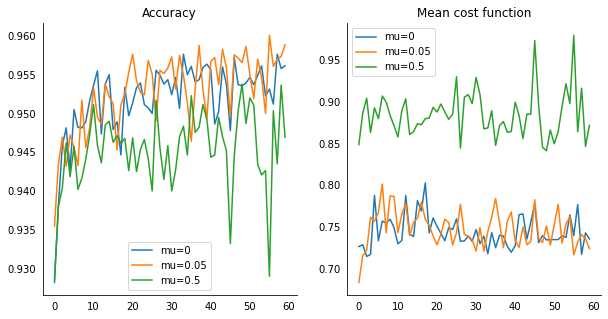

In [7]:
res = hyper_param_setting(
    training_data=train, 
    valid_data=valid, 
    random_state=234,
    net_architecture=[784, 30, 10],

    # SGD params 
    eta=0.5, 
    mini_batch_size=10, 
    lmbda=5.,
    mu=[0, 0.05, 0.5],
    epochs=60,
    n_epoch=None,
    )
comparing_hyper_params(res[1], res[0])